In [1]:
import mdtraj
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Loads the .h5 trajectory file from the post-squeeze production run using OpenMM
target_traj = mdtraj.load("/Users/zhaoziyuan/Dropbox/Fall21/Research/Doeke_lab/PDZ_simulation/liganded_squeezed_production1.h5")
top = target_traj[0].topology


In [3]:
# 24 chains from the P 41 3 2 space group, we will calculate RMSD for each
def compute_RMSD_by_chain(target_traj, top, rule, chain_id_list = None):
    chains_rmsd = []
    n_frames = target_traj.n_frames
    if chain_id_list == None:
        chain_id_list = range(top.n_chains)
    for chain_id in chain_id_list:
        atoms_selection = top.select("chainid " + str(chain_id) + " and " + rule)
        if(len(atoms_selection) == 0): # no valid atoms bound to a.a. residues 
            continue
        chain_rmsd = mdtraj.rmsd(target_traj, target_traj, 0, atoms_selection)
        chains_rmsd.append(chain_rmsd)
    
    chains_rmsd = np.array(chains_rmsd)
    return chains_rmsd, np.mean(chains_rmsd, axis = 0), np.std(chains_rmsd, axis = 0)

In [8]:
def plot_RMSD_by_chain(chains_rmsd, rule, n_frames):
    plt.figure(figsize=(18, 12))
    plt.rc('font', size=16)
    plt.title("PDZ domain RMSD by chain (rule: {})".format(rule))
    plt.xlabel("Time (ns)")
    plt.xticks(np.arange(0, n_frames, 100), np.arange(0, n_frames,100) / 10)
    plt.ylabel("RMSD (nm)")
    for chid, chain_rmsd in enumerate(chains_rmsd):
        plt.plot(chain_rmsd, label = "chain " + str(chid))

    plt.legend(loc = 'upper right')


def plot_RMSD_by_chain_stat(avg_rmsd, std_rmsd, rule, n_frames):
    plt.figure(figsize=(18, 12))
    plt.rc('font', size=16)
    plt.title("PDZ domain RMSD by chain (rule: {})".format(rule))
    plt.xlabel("Time (ns)")
    plt.xticks(np.arange(0, n_frames, 100), np.arange(0, n_frames,100) / 10)
    plt.ylabel("RMSD (nm)")
    plt.plot(avg_rmsd, label = "averaged")
    plt.plot(avg_rmsd + std_rmsd, label = "+1 sd")
    plt.plot(avg_rmsd - std_rmsd, label = "-1 sd")
    plt.legend(loc = 'upper right')


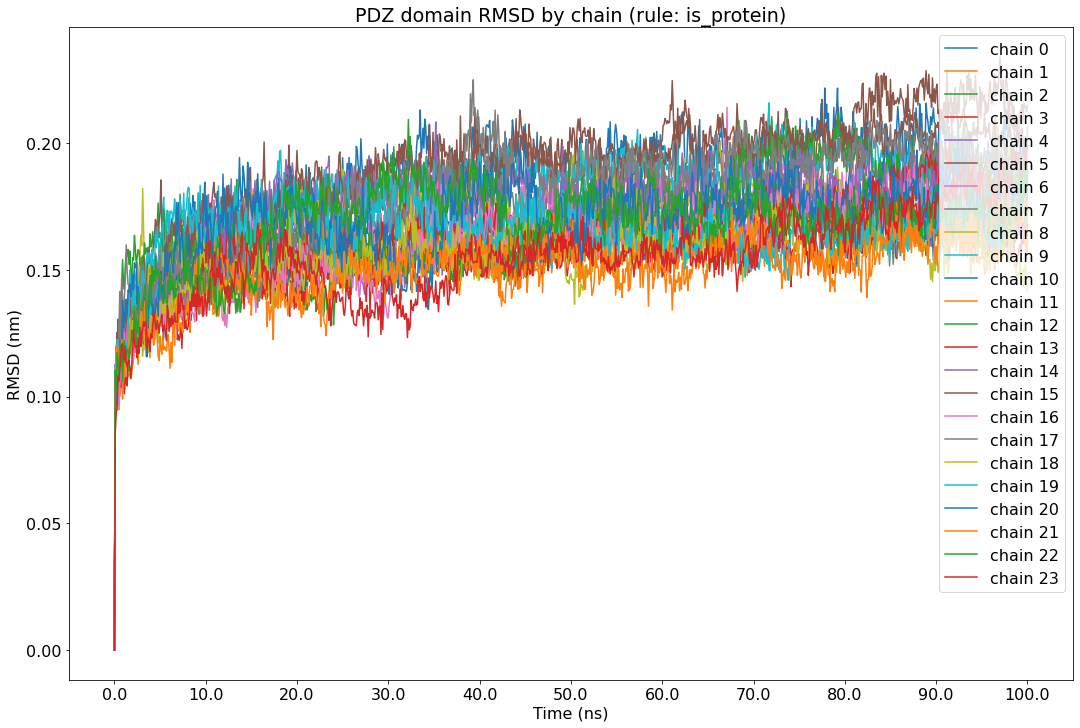

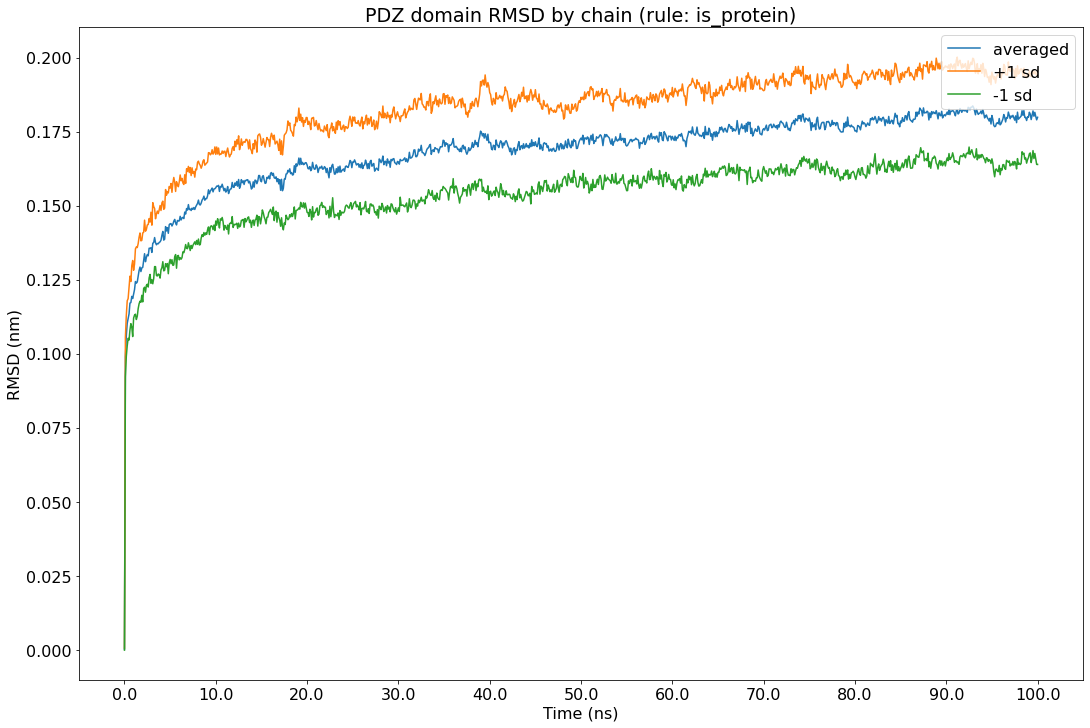

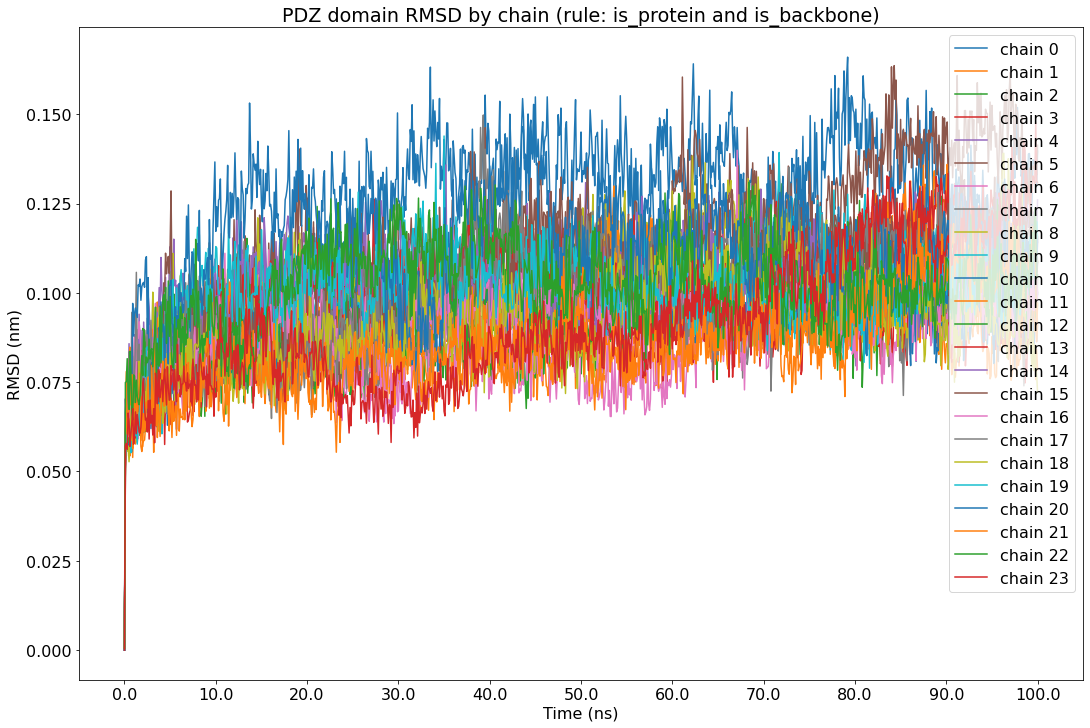

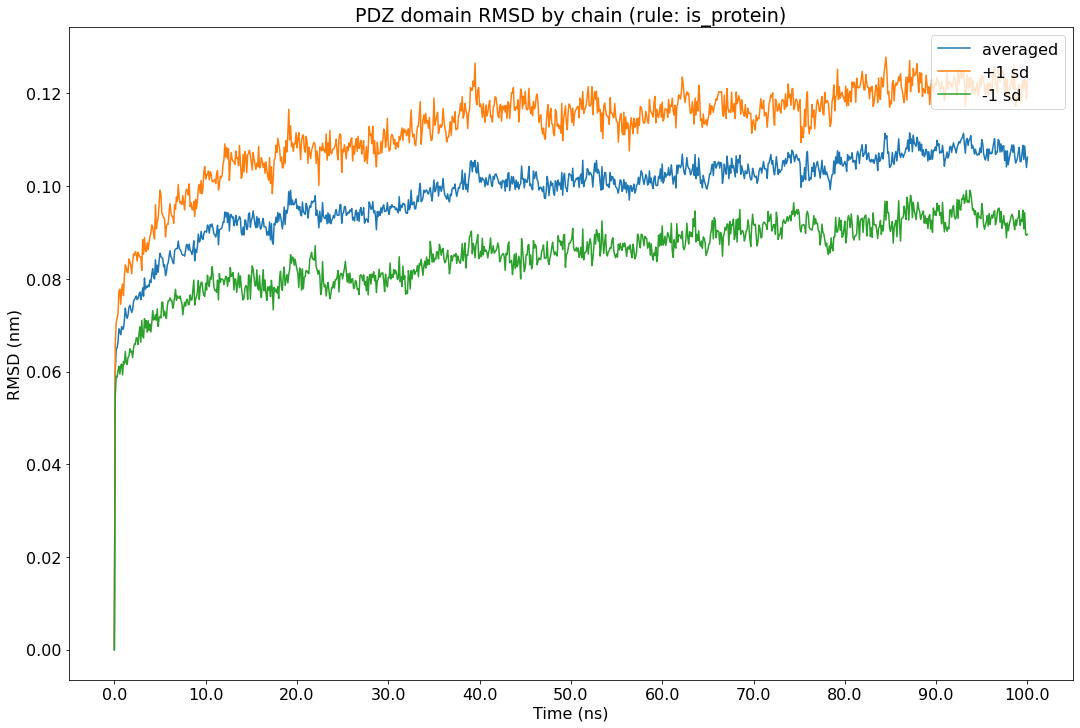

In [12]:
n_frames = len(target_traj)
chains_rmsd_all_atoms, avg_chains_rmsd_all_atoms, std_chains_rmsd_all_atoms = compute_RMSD_by_chain(target_traj, top, "is_protein", range(0, top.n_chains, 1))
plot_RMSD_by_chain(chains_rmsd_all_atoms, "is_protein", n_frames)
plot_RMSD_by_chain_stat(avg_chains_rmsd_all_atoms, std_chains_rmsd_all_atoms, "is_protein", n_frames)


chains_rmsd_backbone_atoms, avg_chains_rmsd_backbone_atoms, std_chains_rmsd_backbone_atoms = compute_RMSD_by_chain(target_traj, top, " is_protein and is_backbone", range(0, top.n_chains, 1))
plot_RMSD_by_chain(chains_rmsd_backbone_atoms, "is_protein and is_backbone", n_frames)
plot_RMSD_by_chain_stat(avg_chains_rmsd_backbone_atoms, std_chains_rmsd_backbone_atoms, "is_protein", n_frames)


/opt/anaconda3/envs/openMM/lib/python3.9/site-packages/mdtraj/utils/validation.py:115: TypeCastPerformanceWarning: Casting atom_indices dtype=float64 to <class 'int'> 
  warnings.warn("Casting %s dtype=%s to %s " % (name, val.dtype, dtype),


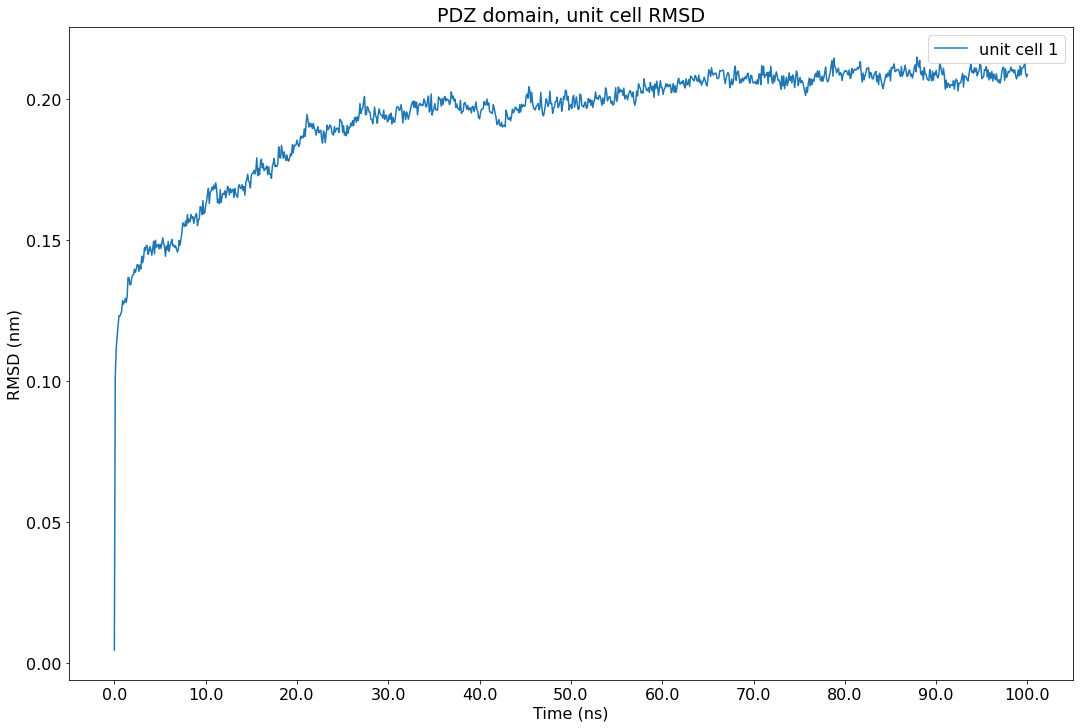

In [13]:
# Now compute RMSD of the whole unit cell (1 by 1 by 1 supercell)

# For liganded PDZ, care is taken to remove all peptide ligands (odd chain ids)

n_frames = target_traj.n_frames
unit_cell_rmsd = mdtraj.rmsd(target_traj, target_traj, 0, np.concatenate([top.select("is_protein and chainid " + str(i)) for i in range(0, top.n_chains, 2)]) )
plt.figure(figsize=(18, 12))
plt.rc('font', size=16)
plt.title("PDZ domain, unit cell RMSD")
plt.xlabel("Time (ns)")
plt.xticks(np.arange(0, n_frames,100), np.arange(0, n_frames,100) / 10)
plt.ylabel("RMSD (nm)")
plt.plot(unit_cell_rmsd, label = "unit cell 1")
plt.legend(loc = 'upper right')


In [4]:
top.n_chains

58